In [1]:
import os 
os.chdir("../../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate

ms = load_from_json(deepcopy(math_spec_json))

msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate], parameter_preperation_functions=[])

Placeholder has no control action options


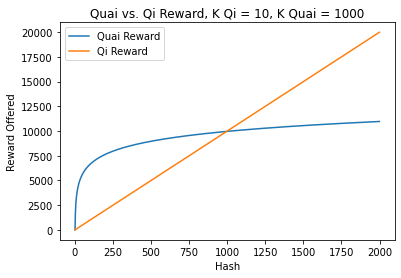

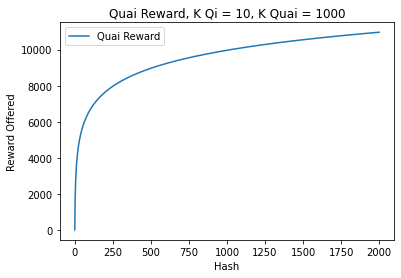

In [2]:
import numpy as np
import matplotlib.pyplot as plt

state["K Qi"] = 10
state["K Quai"] = 1000

hash = np.arange(1, 2000)
quai = [msi.metrics['Hash to Quai Metric'](state, params, [{"Hash": x}]) for x in hash]
qi = [msi.metrics['Hash to Qi Metric'](state, params, [{"Hash": x}]) for x in hash]

plt.plot(hash, quai)
plt.plot(hash, qi)
plt.legend(["Quai Reward", "Qi Reward"])
plt.title("Quai vs. Qi Reward, K Qi = {}, K Quai = {}".format(state["K Qi"],
                                                              state["K Quai"]))
plt.xlabel("Hash")
plt.ylabel("Reward Offered")
plt.show()

plt.plot(hash, quai)
plt.legend(["Quai Reward"])
plt.title("Quai Reward, K Qi = {}, K Quai = {}".format(state["K Qi"],
                                                              state["K Quai"]))
plt.xlabel("Hash")
plt.ylabel("Reward Offered")
plt.show()

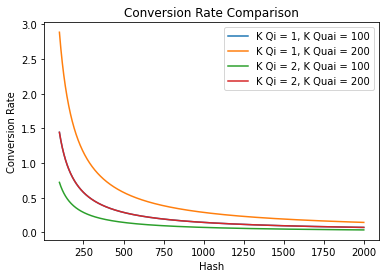

In [3]:
labels = []
hash = np.arange(100, 2000)
y_vals = []
for k_qi in [1, 2]:
    for k_quai in [100, 200]:
        labels.append([k_qi, k_quai])
        state["K Quai"] = k_quai
        state["K Qi"] = k_qi
        y = []
        for h in hash:
            state["Block Difficulty"] = h
            y.append(state["Metrics"]["Conversion Rate Metric"](state, params, []))
        y_vals.append(y)
labels = ["K Qi = {}, K Quai = {}".format(x[0], x[1]) for x in labels]

for y in y_vals:
    plt.plot(hash, y)
plt.title("Conversion Rate Comparison")
plt.xlabel("Hash")
plt.ylabel("Conversion Rate")
plt.legend(labels)
plt.show()

In [4]:
a = msi.metrics['Hash to Quai Metric'](state, params, [{"Hash": 100}])
b = msi.metrics['Hash to Qi Metric'](state, params, [{"Hash": 100}])


print(a, b)

1328.771237954945 200


In [5]:
a = msi.metrics['Quai to Hash Metric'](state, params, [{"Quai": a}])
b = msi.metrics['Qi to Hash Metric'](state, params, [{"Qi": b}])

print(a, b)

100.00000000000004 100.0
